In [1]:
! pip install adversarial-robustness-toolbox

     |████████████████████████████████| 1.1 MB 949 kB/s eta 0:00:01


# Module

In [1]:
#Import Library
import random
import numpy as np
import matplotlib.pyplot as plt

# TensorFlow with Keras.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D, Dropout
tf.compat.v1.disable_eager_execution()

# Dataset

In [2]:
# MNIST 데이터셋 준비

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()   

# 각 데이터 크기 출력
print(f"x_train.shape: {x_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"x_test.shape: {x_test.shape}")
print(f"y_test.shape: {y_test.shape}")

x_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
x_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


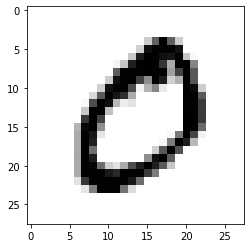

0


In [3]:
# x_train[1] 이미지 출력, y_train 확인
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

print(y_train[1])

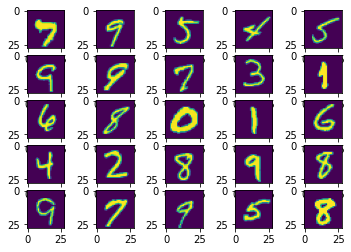

In [4]:
# Visualize random datasets
#Visualize Dataset 
show_images = []
for _ in range(5 * 5):
    show_images.append(x_train[random.randint(0, len(x_train))])

for idx, image in enumerate(show_images):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(image)

# Preprocessing

In [5]:
# Normalization - x
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

x_train_norm = x_train.astype('float32')/255.0
x_test_norm = x_test.astype('float32') / 255.0

print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))
#print(f"x_train.shape: {x_train.shape}")

최소값: 0  최대값: 255
최소값: 0.0  최대값: 1.0


In [6]:
# Normalization - y (One-hot-encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Model

In [7]:
from keras.layers import Input,Conv2D,Dropout, Dense,Flatten,GlobalAveragePooling2D,MaxPool2D
from keras.models import Model

#  tf.keras의 Sequential API를 이용하여 LeNet 모델 생성
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [9]:
# 채널수 맞추기
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))


Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


# Train Model

In [10]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])


In [11]:
model.fit(x_train_reshaped, y_train, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.1913 - accuracy: 0.9427
Epoch 2/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0653 - accuracy: 0.9797
Epoch 3/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0466 - accuracy: 0.9852
Epoch 4/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0373 - accuracy: 0.9879
Epoch 5/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0305 - accuracy: 0.9904
Epoch 6/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0244 - accuracy: 0.9924
Epoch 7/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0210 - accuracy: 0.9933
Epoch 8/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0168 - accuracy: 0.9946
Epoch 9/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0140 - accuracy: 0.9956
Epoch 10/10
6

# Model Evaluation

In [12]:
predictions = model.predict(x_test_reshaped)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print('Accuracy on benign test example: {}%'.format(accuracy*100))

/home/aiffel/anaconda3/envs/aiffel2/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Accuracy on benign test example: 98.97%


# Adversarial Examples

# Carlini and Wagner L_2 Attack

In [13]:
# ART
import art
from art.attacks.evasion import CarliniL2Method
from art.estimators.classification import KerasClassifier

In [14]:
#Wrap model with ART Keras Classifier
estimator = KerasClassifier(model=model, clip_values=(0,1), use_logits=False)

# 1. 이미지 갯수 줄여서 진행

In [15]:
# test7-1
#Create CW_L2 Instance
carliniL2_attack = CarliniL2Method(estimator, confidence=0.0, targeted=False, 
                                   learning_rate=0.9, 
                                   max_iter=100, batch_size=200)

#Create Adversarial Examples
x_attack_CW_L2 = carliniL2_attack.generate(x_test_reshaped[:100])

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
loss,acc = model.evaluate(x_attack_CW_L2,y_test[:100])
print('Accuracy on Adversarial Exmaples: {}%'.format(acc* 100))

Accuracy on Adversarial Exmaples: 93.99999976158142%


/home/aiffel/anaconda3/envs/aiffel2/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [17]:
# test7-2
#Create CW_L2 Instance
carliniL2_attack = CarliniL2Method(estimator, confidence=0.0, targeted=False, 
                                   learning_rate=0.9, 
                                   max_iter=1000, batch_size=200)

#Create Adversarial Examples
x_attack_CW_L2 = carliniL2_attack.generate(x_test_reshaped[:100])

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
loss,acc = model.evaluate(x_attack_CW_L2,y_test[:100])
print('Accuracy on Adversarial Exmaples: {}%'.format(acc* 100))

Accuracy on Adversarial Exmaples: 93.99999976158142%


In [33]:
# test7-3
#Create CW_L2 Instance
carliniL2_attack = CarliniL2Method(estimator, confidence=0.8, targeted=False, 
                                   learning_rate=0.9, 
                                   max_iter=1000)

#Create Adversarial Examples
x_attack_CW_L2 = carliniL2_attack.generate(x_test_reshaped[:100])

C&W L_2:   0%|          | 0/100 [00:00<?, ?it/s]

In [35]:
loss,acc = model.evaluate(x_attack_CW_L2,y_test[:100])
print('Accuracy on Adversarial Exmaples: {}%'.format(acc* 100))

Accuracy on Adversarial Exmaples: 93.99999976158142%


# 원본 그대로 진행

In [22]:
#Create CW_L2 Instance
attack = CarliniL2Method(estimator,confidence=0.0,max_iter=100,
                        batch_size=200)

#Create Adversarial Examples
examples = attack.generate(x_test_reshaped,y_test)

C&W L_2:   0%|          | 0/50 [00:00<?, ?it/s]

In [23]:
prediction = model.predict(examples)

accuracy = np.sum(np.argmax(prediction, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print('Accuracy on Adversarial Exmaples: {}%'.format(accuracy * 100))

Accuracy on Adversarial Exmaples: 92.29%


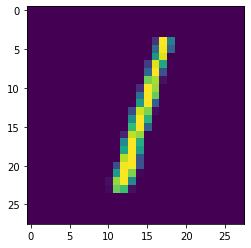

In [28]:
# Show Adversarial Examples
plt.imshow(examples[2].reshape(28,28))

# Other Test

In [16]:
# test2
#Create CW_L2 Instance
carliniL2_attack = CarliniL2Method(estimator, confidence=0.0, targeted=False, 
                                   learning_rate=0.7, 
                                   max_iter=100, batch_size=200)

#Create Adversarial Examples
examples = carliniL2_attack.generate(x_test_reshaped,y_test)

C&W L_2:   0%|          | 0/50 [00:00<?, ?it/s]

In [17]:
prediction = model.predict(examples)

accuracy = np.sum(np.argmax(prediction, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print('Accuracy on Adversarial Exmaples: {}%'.format(accuracy * 100))

Accuracy on Adversarial Exmaples: 91.97%


## 이미지 갯수 줄이기

In [19]:
# test3-1
#Create CW_L2 Instance
carliniL2_attack = CarliniL2Method(estimator, confidence=0.0, targeted=False, 
                                   learning_rate=0.7, 
                                   max_iter=1000, batch_size=200)

#Create Adversarial Examples
examples = carliniL2_attack.generate(x_test_reshaped[:100],y_test[:100])

C&W L_2:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
prediction = model.predict(examples)

accuracy = np.sum(np.argmax(prediction, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print('Accuracy on Adversarial Exmaples: {}%'.format(accuracy * 100))

Accuracy on Adversarial Exmaples: 0.0%


/home/aiffel/anaconda3/envs/aiffel2/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
# test3-2
#Create CW_L2 Instance
carliniL2_attack = CarliniL2Method(estimator, confidence=0.0, targeted=False, 
                                   learning_rate=0.7, 
                                   max_iter=1000, batch_size=200)

#Create Adversarial Examples
examples = carliniL2_attack.generate(x_test_reshaped[:1000],y_test[:1000])

C&W L_2:   0%|          | 0/5 [00:00<?, ?it/s]

In [22]:
prediction = model.predict(examples)

accuracy = np.sum(np.argmax(prediction, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print('Accuracy on Adversarial Exmaples: {}%'.format(accuracy * 100))

Accuracy on Adversarial Exmaples: 0.0%


/home/aiffel/anaconda3/envs/aiffel2/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
# test3-3
#Create CW_L2 Instance
carliniL2_attack = CarliniL2Method(estimator, confidence=0.0, targeted=False, 
                                   learning_rate=0.7, 
                                   max_iter=5000, batch_size=516)

#Create Adversarial Examples
examples = carliniL2_attack.generate(x_test_reshaped,y_test)

C&W L_2:   0%|          | 0/20 [00:00<?, ?it/s]

KeyboardInterrupt: 

# Carlini and Wagner L_inf Attack

# 1. 이미지 갯수 줄이기

In [23]:
from art.attacks.evasion import CarliniLInfMethod

carliniLInf_attack = CarliniLInfMethod(estimator, confidence=0.0,
                                       learning_rate=0.9,
                                       max_iter=1000)

#Create Adversarial Examples
x_attack_CW_inf = carliniLInf_attack.generate(x_test_reshaped[:100])

C&W L_inf:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
loss,acc = model.evaluate(x_attack_CW_inf,y_test[:100])
print('Accuracy on Adversarial Exmaples: {}%'.format(acc* 100))

Accuracy on Adversarial Exmaples: 81.99999928474426%


In [26]:
from art.attacks.evasion import CarliniLInfMethod

carliniLInf_attack = CarliniLInfMethod(estimator, confidence=0.0,
                                       learning_rate=0.9,
                                       max_iter=10000)

#Create Adversarial Examples
x_attack_CW_inf = carliniLInf_attack.generate(x_test_reshaped[:100])

C&W L_inf:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
loss,acc = model.evaluate(x_attack_CW_inf,y_test[:100])
print('Accuracy on Adversarial Exmaples: {}%'.format(acc* 100))

Accuracy on Adversarial Exmaples: 81.99999928474426%


In [30]:
from art.attacks.evasion import CarliniLInfMethod

carliniLInf_attack = CarliniLInfMethod(estimator, confidence=0.5,
                                       learning_rate=0.9,
                                       max_iter=1000)

#Create Adversarial Examples
x_attack_CW_inf = carliniLInf_attack.generate(x_test_reshaped[:100])

C&W L_inf:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
loss,acc = model.evaluate(x_attack_CW_inf,y_test[:100])
print('Accuracy on Adversarial Exmaples: {}%'.format(acc* 100))

Accuracy on Adversarial Exmaples: 82.99999833106995%


In [28]:
from art.attacks.evasion import CarliniLInfMethod

carliniLInf_attack = CarliniLInfMethod(estimator, confidence=0.8,
                                       learning_rate=0.9,
                                       max_iter=1000)

#Create Adversarial Examples
x_attack_CW_inf = carliniLInf_attack.generate(x_test_reshaped[:100])

C&W L_inf:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
loss,acc = model.evaluate(x_attack_CW_inf,y_test[:100])
print('Accuracy on Adversarial Exmaples: {}%'.format(acc* 100))

Accuracy on Adversarial Exmaples: 85.00000238418579%


# 2. 원본 그대로 진행

In [29]:
from art.attacks.evasion import CarliniLInfMethod

carliniLInf_attack = CarliniLInfMethod(estimator, confidence=0.0, targeted=False, 
                                       learning_rate=0.01, max_iter=10, 
                                       max_halving=5, max_doubling=5, 
                                       eps=0.3, batch_size=128)

In [31]:
#Create Adversarial Examples
examples = carliniLInf_attack.generate(x_test_reshaped,y_test)

C&W L_inf:   0%|          | 0/79 [00:00<?, ?it/s]

In [32]:
prediction = model.predict(examples)

accuracy = np.sum(np.argmax(prediction, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print('Accuracy on Adversarial Exmaples: {}%'.format(accuracy * 100))

Accuracy on Adversarial Exmaples: 89.77000000000001%


In [38]:
# test3 
carliniLInf_attack = CarliniLInfMethod(estimator, confidence=0.0,
                                       learning_rate=0.01,
                                       max_iter=100, batch_size=200)

#Create Adversarial Examples
examples = carliniLInf_attack.generate(x_test_reshaped,y_test)

C&W L_inf:   0%|          | 0/50 [00:00<?, ?it/s]

In [39]:
prediction = model.predict(examples)

accuracy = np.sum(np.argmax(prediction, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print('Accuracy on Adversarial Exmaples: {}%'.format(accuracy * 100))

Accuracy on Adversarial Exmaples: 89.77000000000001%


In [42]:
# test4 
carliniLInf_attack = CarliniLInfMethod(estimator, confidence=0.0,
                                       learning_rate=0.5,
                                       max_iter=5000, batch_size=200)

#Create Adversarial Examples
examples = carliniLInf_attack.generate(x_test_reshaped,y_test)

C&W L_inf:   0%|          | 0/50 [00:00<?, ?it/s]

In [43]:
prediction = model.predict(examples)

accuracy = np.sum(np.argmax(prediction, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print('Accuracy on Adversarial Exmaples: {}%'.format(accuracy * 100))

Accuracy on Adversarial Exmaples: 83.61%


In [44]:
# test4 
carliniLInf_attack = CarliniLInfMethod(estimator, confidence=0.8,
                                       learning_rate=0.5,
                                       max_iter=5000, batch_size=200)

#Create Adversarial Examples
examples = carliniLInf_attack.generate(x_test_reshaped,y_test)

C&W L_inf:   0%|          | 0/50 [00:00<?, ?it/s]

In [45]:
prediction = model.predict(examples)

accuracy = np.sum(np.argmax(prediction, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print('Accuracy on Adversarial Exmaples: {}%'.format(accuracy * 100))

Accuracy on Adversarial Exmaples: 85.33%


In [29]:
# test 5
from art.attacks.evasion import CarliniLInfMethod

carliniLInf_attack = CarliniLInfMethod(estimator, confidence=0.0, targeted=False, 
                                       learning_rate=0.9, 
                                       max_iter=100)

#Create Adversarial Examples
examples = carliniLInf_attack.generate(x_test_reshaped[:100],y_test[:100])

C&W L_inf:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
prediction = model.predict(examples)

accuracy = np.sum(np.argmax(prediction, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print('Accuracy on Adversarial Exmaples: {}%'.format(accuracy * 100))

Accuracy on Adversarial Exmaples: 0.0%


/home/aiffel/anaconda3/envs/aiffel2/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
from art.attacks.evasion import CarliniLInfMethod

carliniLInf_attack = CarliniLInfMethod(estimator, confidence=0.0, targeted=False, 
                                       learning_rate=0.9, 
                                       max_iter=1000)

#Create Adversarial Examples
examples = carliniLInf_attack.generate(x_test_reshaped[:100],y_test[:100])

C&W L_inf:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
prediction = model.predict(examples)

accuracy = np.sum(np.argmax(prediction, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print('Accuracy on Adversarial Exmaples: {}%'.format(accuracy * 100))

Accuracy on Adversarial Exmaples: 0.0%


/home/aiffel/anaconda3/envs/aiffel2/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
from art.attacks.evasion import CarliniLInfMethod

carliniLInf_attack = CarliniLInfMethod(estimator, confidence=0.0, targeted=False, 
                                       learning_rate=0.9, 
                                       max_iter=1000)

#Create Adversarial Examples
examples = carliniLInf_attack.generate(x_test_reshaped[:5000],y_test[:5000])

C&W L_inf:   0%|          | 0/40 [00:00<?, ?it/s]

In [36]:
prediction = model.predict(examples)

accuracy = np.sum(np.argmax(prediction, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print('Accuracy on Adversarial Exmaples: {}%'.format(accuracy * 100))

Accuracy on Adversarial Exmaples: 0.0%


/home/aiffel/anaconda3/envs/aiffel2/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
from art.attacks.evasion import CarliniLInfMethod

carliniLInf_attack = CarliniLInfMethod(estimator, confidence=0.0, targeted=False, 
                                       learning_rate=0.9, 
                                       max_iter=1000)

#Create Adversarial Examples
examples = carliniLInf_attack.generate(x_test_reshaped,y_test)

C&W L_inf:   0%|          | 0/79 [00:00<?, ?it/s]

In [39]:
prediction = model.predict(examples)

accuracy = np.sum(np.argmax(prediction, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print('Accuracy on Adversarial Exmaples: {}%'.format(accuracy * 100))

Accuracy on Adversarial Exmaples: 81.35%


In [40]:
from art.attacks.evasion import CarliniLInfMethod

carliniLInf_attack = CarliniLInfMethod(estimator, confidence=0.0, targeted=False, 
                                       learning_rate=0.9, 
                                       max_iter=10000)

#Create Adversarial Examples
examples = carliniLInf_attack.generate(x_test_reshaped,y_test)

C&W L_inf:   0%|          | 0/79 [00:00<?, ?it/s]

In [41]:
prediction = model.predict(examples)

accuracy = np.sum(np.argmax(prediction, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print('Accuracy on Adversarial Exmaples: {}%'.format(accuracy * 100))

Accuracy on Adversarial Exmaples: 81.35%


In [48]:
import tensorflow as tf 
tf.__version__

'2.4.1'

In [43]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13086145721586516808,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7367080032
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17020403411246410941
 physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"]